In [0]:
%pylab inline
import os

import numpy as np

from PIL import Image
from torchvision import transforms
from torchvision.models import resnet50
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import datasets, models, transforms


from tqdm import tqdm

import torch
from torch import nn

Populating the interactive namespace from numpy and matplotlib


In [0]:
from google.colab import drive 
drive.mount('mydrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at mydrive


In [0]:
! ls "/content/mydrive/My Drive/terrassa_buildings_2019/"

In [0]:
!unzip -qq "/content/mydrive/My Drive/terrassa_buildings_2019/database.zip"

In [0]:
!unzip -qq "/content/mydrive/My Drive/terrassa_buildings_2019/queries.zip"

In [0]:
!cp "/content/mydrive/My Drive/terrassa_buildings_2019/database.txt" .

In [0]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

import os
import numpy as np
import pickle
from keras.preprocessing import image
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

queriesfoto = []

path='queries'
for(path,dirs,files) in os.walk(path):
    if path == 'queries/queries': 
        for i in range(0,len(files)):
            chorro = 'queries/queries/' + str(files[i])
            img_path = chorro
            img = image.load_img(img_path, target_size=(224, 224))
            queriesfoto.append(img)

Using TensorFlow backend.


In [0]:
lqueriesfoto = []

for m in range(len(queriesfoto)):
    lqueriesfoto.append(np.array(queriesfoto[m]))

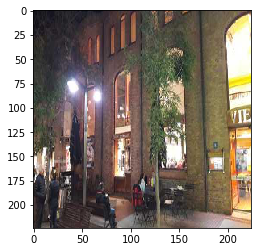

In [0]:
plt.imshow(lqueriesfoto[0])

In [0]:
databasefoto = []

path='database'
for(path,dirs,files) in os.walk(path):
    if path == 'database/database': 
        for i in range(0,len(files)):
            chorro = 'database/database/' + str(files[i])
            img_path = chorro
            img = image.load_img(img_path, target_size=(224, 224))
            databasefoto.append(img)

In [0]:
databasefoto

In [0]:
ldatabasefoto = []

for p in range(len(databasefoto)):
    ldatabasefoto.append(np.array(databasefoto[p]))

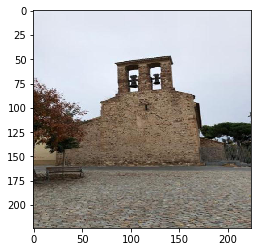

In [0]:
plt.imshow(ldatabasefoto[0])

In [0]:
pickle_out_database = open("databasefoto.p", "wb")
pickle.dump(ldatabasefoto, pickle_out_database)
pickle_out_database.close()

In [0]:
pickle_out_queries = open("queriesfoto.p", "wb")
pickle.dump(lqueriesfoto, pickle_out_queries)
pickle_out_queries.close()

In [0]:
len(databasefoto)

2061

In [0]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn import preprocessing
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

numimg = 0

In [0]:
pickle_in_database = open("databasefoto.p","rb")
databasefoto = pickle.load(pickle_in_database)

pickle_in_queries = open("queriesfoto.p","rb")
queriesfoto = pickle.load(pickle_in_queries)

In [0]:
import os
import numpy as np
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)





574717952/574710816 [==============================] - 17s 0us/step








In [0]:
database = np.empty((0,4096))

path='database'
for(path,dirs,files) in os.walk(path):
    if path == 'database/database': 
        for i in range(0,len(files)):
            chorro = 'database/database/' + str(files[i])
            img_path = chorro
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            capa = model.predict(x)
            database = np.append(database, capa, axis=0) 

In [0]:
database.shape

(2061, 4096)

In [0]:
queries = np.empty((0,4096))

path='queries'
for(path,dirs,files) in os.walk(path):
    if path == 'queries/queries': 
        for i in range(0,len(files)):
            chorro = 'queries/queries/' + str(files[i])
            img_path = chorro
            img = image.load_img(img_path, target_size=(224, 224))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = preprocess_input(x)
            capa = model.predict(x)
            queries = np.append(queries, capa, axis=0) 

In [0]:
queries.shape

(2065, 4096)

In [0]:
print(database[500], len(queries))

[0.50634313 1.16410351 0.         ... 0.         0.         0.        ] 2065


In [0]:
import pickle

pickle_out_database = open("database.p", "wb")
pickle.dump(database, pickle_out_database)
pickle_out_database.close()

In [0]:
pickle_out_queries = open("queries.p", "wb")
pickle.dump(queries, pickle_out_queries)
pickle_out_queries.close()

In [0]:
pickle_in_database2 = open("database.p","rb")
x_database = pickle.load(pickle_in_database2)

pickle_in_queries2 = open("queries.p","rb")
x_queries = pickle.load(pickle_in_queries2)

In [0]:
import os
import numpy as np
from keras.preprocessing import image
from sklearn import preprocessing
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import sklearn.preprocessing

numimg = 0

In [0]:
x_queries.shape

(2065, 4096)

In [0]:
x_databasenorm=preprocessing.normalize(x_database)
x_queriesnorm=preprocessing.normalize(x_queries)

In [0]:
x_mult=np.matmul(x_queries,np.ndarray.transpose(x_database))

In [0]:
ranks = np.argsort(x_mult, axis=1)[:,::-1]

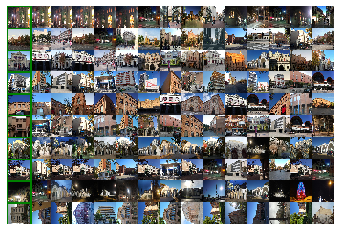

In [0]:
# get the original images for visualization
x_database_images = databasefoto
x_queries_images = queriesfoto

h,w = (224, 224)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 40 # it will show results from query #'offset' to #offset+10
for q in range(10):
    ranks_q = ranks[q*(offset+1),:]
    for i in range(15):
        new_image.paste( Image.fromarray(x_database_images[ranks_q[i]]), (h*(1+i),w*q))

  # visualize query
    ima_q = Image.fromarray(x_queries_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=15, fill='green')

    new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()

In [0]:
import os
listdata=os.listdir("/content/database/database")
listquery=os.listdir("/content/queries/queries")

In [0]:
import csv

csv1 = []

    
for q in range (2065):
    ranks_q = ranks[q,:]
    csv2 = []
    naq,jpg= os.path.splitext(listquery[q])
    csv2.append(naq + ',')
    for i in range (2061):
        if i == 0:
          name,jpg= os.path.splitext(listdata[ranks_q[i]])
        if i == 2061:
          name,jpg= os.path.splitext(name + '\n')
        else:
          name,jpg= os.path.splitext(name + ' ' + listdata[ranks_q[i]])
    csv2.append(name)
    csv1.append(csv2)

In [0]:
with open("f2.txt", "w") as txt_file:
    for line in csv1:
        txt_file.write(" ".join(line) + "\n") 

In [0]:
!dir
from google.colab import files
files.download('outputf.txt')

Cercavisual_kaggle.jpg	database.txt	    output.txt	   ranks_kaggle.p
database		kaggleE4final2.csv  queries	   sample_data
databasefoto.p		mydrive		    queriesfoto.p  sortida
database.p		outputf.txt	    queries.p	   sortidaf


In [0]:
pickle_out_ranks_k = open("ranks_kaggle.p", "wb")
pickle.dump(ranks, pickle_out_ranks_k)
pickle_out_ranks_k.close()